# Deep Reinforcement Learning --- Assignment 1

In [ ]:
import numpy as np
import itertools
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from IPython.display import Video
import os

class Cell:
  cellType = 0
  def __init__(self, cellType=0, reward=0, available=True, terminal=False):
    self.reward = reward
    self.walls = 0
    self.cellType = cellType
    self.available = available
    self.terminal = terminal

  def __str__(self):
    return self.cellType

class Sprite:
  def __init__(self, img, mask):
    self.img = img
    self.mask = mask
    self.width, self.height, _ = img.shape

  def draw(self, img, position):
    img[position[1] : position[1]+self.height, position[0] : position[0]+self.height] &= self.mask
    img[position[1] : position[1]+self.height, position[0] : position[0]+self.height] |= self.img

class Maze:
  def __init__(self, maze, colors, player, background, resolution, epsilon=0):
    self.maze = maze
    self.colors = colors
    self.player = player
    self.resolution = resolution
    self.epsilon=epsilon
    self.background = background
    self.mazeHeight, self.mazeWidth = maze.shape
    self.imgWidth = self.mazeWidth * self.resolution
    self.imgHeight = self.mazeHeight * self.resolution
    self.reset()

  def reset(self, fixedPosition=True):
    self.reward = 0.0
    self.cumulativeReward = 0.0
    self.steps = 0
    self.x = 1*fixedPosition
    self.y = 1*fixedPosition
    while(not self.maze[self.y, self.x].available):
      self.x = np.random.randint(1, self.mazeWidth)
      self.y = np.random.randint(1, self.mazeHeight)
    self.replay_path = []
    self.replay_path.append((self.y, self.x))

  def info(self):
    info = dict()
    info["dimensions"] = self.maze.shape
    info["epsilon"] = self.epsilon
    info["actions"] = (1, 2, 4, 8)
    return info

  def render(self):
    border = 10
    img = self.background.copy()
    self.player.draw(img, (self.x*self.resolution, self.y*self.resolution))
    img = img[self.resolution-border: -self.resolution+border, self.resolution-border: -self.resolution+border]
    return img

  def display(self):
    cv2_imshow(self.render())

  def showReplay(self):
    video_path = "tmp.mp4"
    video = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*"JPEG"), 10.0, (env.render().shape[1::-1]))
    for pos in self.replay_path:
      self.y, self.x = pos
      video.write(env.render())
    video.release()
    fileToDisplay = "video.mp4"
    os.system(f"ffmpeg -y -i {video_path} -vcodec libx264 -x264opts keyint=123:min-keyint=120 -an {fileToDisplay}")
    display(Video(fileToDisplay, embed=True))

  def action(self, dir):
    dir_e = int((np.random.randint(1,3)<<2)/((dir|dir>>1)&5)*(np.random.random()<self.epsilon))
    dir = dir*(not dir_e) | dir_e
    x=self.x + (dir&1) - (dir>>1&1)
    y=self.y + (dir>>2&1) - (dir>>3&1)
    self.x=x*self.maze[y, x].available + self.x*(not self.maze[y, x].available)
    self.y=y*self.maze[y, x].available + self.y*(not self.maze[y, x].available)
    self.replay_path.append((self.y, self.x))
    return dir

  def state(self, lastAction = 0):
    done = self.maze[self.y, self.x].terminal
    reward = self.maze[self.y, self.x].reward
    info = self.info()
    return (self.y, self.x), lastAction, reward, done

  def step(self, action):
    action = self.action(action)
    return self.state(action)


#The environment
The environment was defined in the Maze class.<br><br>
##The most important elements:
###State
State is returned by methods step(action) and state().<br>
State consists of 5 values:
*position, lastAction, reward, done, info*:
* position --- tuple of two real numbers (y, x),
* lastAction --- last action passed to step(),
* reward --- real number,
* done --- boolean value: True if game is over,

###Info
Method *info()* returns a dictionary containing information about the environment,
 * dimensions --- shape of the environment,
 * epsilon --- the probability of taking a random step,
 * actions --- available actions.

###Action
Action is determined by value: 1, 2, 4 or 8:
*   1 --- right,
*   2 --- left,
*   4 --- down,
*   8 --- up.

###Reset
reset(fixedPosition=True) resets the eivironment.<br>
fixedPosition:
* True --- agent starts at position 1, 1
* False --- agent starts at random position

###Visualisation
* display() --- display image of actual environment state
* showReplay() --- display video of the last game

#Loading environment
**Put your ID in the *student_id* variable**

---



In [ ]:
from urllib.request import urlopen
import pickle

def download_dataset(filename):
  base_url =f"https://github.com/pa-k/DRL2022/blob/main/DRL_assignment1/{filename}?raw=true"
  url = urlopen(base_url)
  binary_data = url.read()
  with open(filename, "wb") as f:
    f.write(binary_data)

def loadEnv(student_id):
  file_id = student_id%5
  filename = f"DRL_a{file_id}.pickle"
  if not os.path.exists(filename):
    download_dataset(filename)
  with open(filename, 'rb') as file2:
    env = pickle.load(file2)
  return env

student_id = 184297
env = loadEnv(student_id)


#Printing environment and the state details

In [ ]:
info = env.info()
print("info", info)
print("environment dimensions", info["dimensions"])
print("probability of random step", info["epsilon"])
print("allowed actions", info["actions"])

actPos, action, reward, done = env.state()
print("\nagent position", actPos)
print("performed action", action)
print("last reward", reward)
print("the game is over", done)

info {'dimensions': (7, 8), 'epsilon': 0.0, 'actions': (1, 2, 4, 8)}
environment dimensions (7, 8)
probability of random step 0.0
allowed actions (1, 2, 4, 8)

agent position (1, 1)
performed action 0
last reward 0
the game is over False


#Visualization examples

##Example 1:
###Print environment status and display visualization in four steps: right, right, left, down

((1, 1), 0, 0, False)


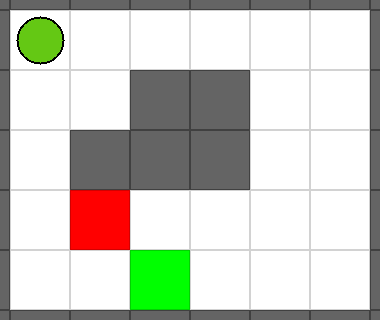



 ((1, 2), 1, 0, False)


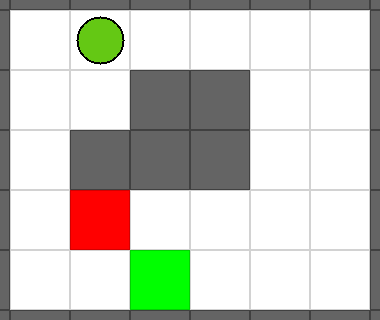



 ((1, 3), 1, 0, False)


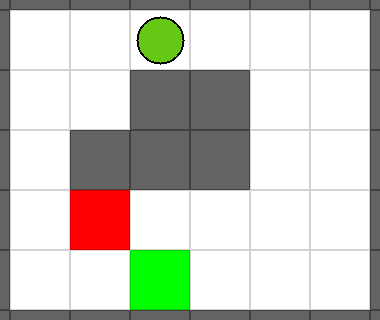



 ((1, 2), 2, 0, False)


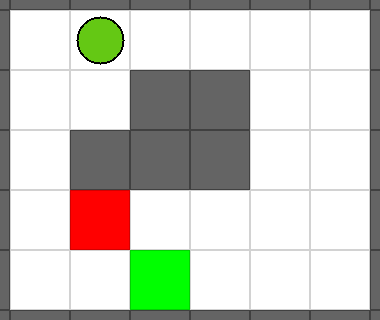



 ((2, 2), 4, 0, False)


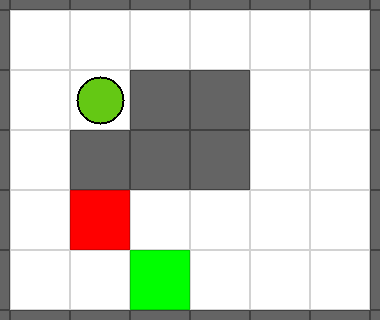

In [ ]:
steps = [1, 1, 2, 4] # right, right, left, down
env.reset()
print(env.state())
env.display()
for step in steps:
  state = env.step(step)
  print("\n\n", state)
  env.display()

##Example 2:
### Generating a video of last game

In [ ]:
  env.reset()
  env.step(1) # right
  env.step(4) # down
  env.step(2) # left
  env.step(8) # up
  env.step(1) # right
  env.step(1) # right
  env.step(1) # right
  env.step(1) # right
  env.step(1) # right
  env.showReplay()

##Example 3:
###Simple random agent with Visualization

In [ ]:
class RandomAgent:
  def __init__(self, actions):
    self.actions = actions

  def play(self, state):
    return np.random.choice(self.actions)

env.reset()
info = env.info()
state = env.state()
agent = RandomAgent(info["actions"])
for step in range(300):
  action = agent.play(state)
  state = env.step(action)
  if state[3] == True:
    break
env.showReplay()
if(state[2]>0):
  print("Yupi :)")
if(state[2]<0):
  print(":<")

Yupi :)


#PL
###Zadanie 1 --- max 20 p.

Zaimplementuj algorytm Monte-Carlo do uczenia wartość *V*.<br>
Kluczowe elementy:
* Implementacja tablicy wartości *V*.
* Opracowanie funkcji wyboru najlepszej akcji na podstawie tablicy wartości *V*.
* Implementacja algorytmu aktualizacji tablicy wartości *V* na podstawie zebranych epizodów.
* Implementacja dwóch metody eksploracji: e-greedy + inna metoda.
* Dobór długości epizodów, liczby epizodów i epok.

Przetestuj uczenie:
* bez kary za krok,
* z karą -0.1 za krok,
* zaproponuj własną karę za krok i inne usprawnienia.

Jak kara za krok wpływa na zaimplementowaną motodę uczenia wartości *V*?<br>
Przedstaw wyniki oraz wnioski z uczenia wartości *V* metodą Monte-Carlo.

#Eng
###Assignment 1 --- max 20 p.
Implement the Monte Carlo algorithm for learning the *V-value* function.<br>
Key elements:
* V-value array implementation.
* Development of a function to choose the best action based on the V-value array.
* Implementation of an algorithm to update the *V-values* based on the collected episodes.
* Implementation of the two exploration methods: e-greedy + other method.
* Selection of the maximum length of episodes, number of episodes and epochs.

Test learning:
* without step penalty,
* with -0.1 penalty per step,
* suggest your own step penalty and other improvements.

How does the step penalty affect the implemented V learning method? <br>
Present the results and conclusions from learning the V-values using the Monte-Carlo method.

#My Solution

In [ ]:
class MonteCarloAgentV:
    def __init__(self, env, strategy="epsilon-greedy", epsilon=0.1, tau=1.0, max_steps=1000, step_penalty=0.0):
        env.reset()
        self.env = env
        # epsilon-greedy or softmax
        self.strategy = strategy
        self.epsilon = epsilon
        self.tau = tau
        self.max_steps = max_steps
        self.step_penalty = step_penalty
        self.actions = env.info()["actions"]
        self.dimensions = env.info()["dimensions"]
        # V matrix where each element (of x * y elements) contains value of given state
        self.V = np.zeros(self.dimensions)
        self.returns_sum = np.zeros(self.dimensions)
        self.returns_count = np.zeros(self.dimensions)

    def get_best_action_greedy(self, state):
        best_action = None
        best_value = -np.inf
        for action in self.actions:
            next_state = self.get_next_state(state, action)
            if next_state:
                y, x = next_state
                if self.V[y, x] > best_value:
                    best_value = self.V[y, x]
                    best_action = action
        return best_action if best_action is not None else np.random.choice(self.actions)

    def get_best_action_softmax(self, state):
        action_values = []
        valid_actions = []
        for action in self.actions:
            next_state = self.get_next_state(state, action)
            if next_state:
                y, x = next_state
                action_values.append(self.V[y, x])
                valid_actions.append(action)
        if not valid_actions:
            # If there are no valid actions just return random ?
            return np.random.choice(self.actions)
        # Calculate softmax probabilities
        preferences = np.array(action_values) / self.tau
        max_pref = np.max(preferences)
        exp_preferences = np.exp(preferences - max_pref)
        probabilities = exp_preferences / np.sum(exp_preferences)
        return np.random.choice(valid_actions, p=probabilities)

    def select_action(self, state):
        if self.strategy == "epsilon-greedy":
            if np.random.rand() < self.epsilon:
                return np.random.choice(self.actions)
            else:
                return self.get_best_action_greedy(state)
        elif self.strategy == "softmax":
            return self.get_best_action_softmax(state)
        else:
            raise ValueError("Unknown strategy: choose 'softmax' or 'epsilon-greedy'.")

    def get_next_state(self, state, action):
        # Copy next state calculation from env
        # Not sure how to implement this algorithm without this knowledge
        # Maybe after every action in given state save the next state received from env
        # into array and use this array to estimate what state will be next ?
        y, x = state
        dir = action
        x_new = x + (dir & 1) - ((dir >> 1) & 1)
        y_new = y + ((dir >> 2) & 1) - ((dir >> 3) & 1)
        if 0 <= y_new < self.dimensions[0] and 0 <= x_new < self.dimensions[1]:
            cell = self.env.maze[y_new, x_new]
            if cell.available:
                return (y_new, x_new)
        return None

    def generate_episode(self):
        episode = []
        self.env.reset()
        state, _, _, done = self.env.state()
        steps = 0
        while not done and steps < self.max_steps:
            action = self.select_action(state)
            next_state, _, reward, done = self.env.step(action)
            # Step penalty is assumed to be negative
            reward += self.step_penalty
            episode.append((state, reward))
            state = next_state
            steps += 1
        return episode

    def update_V_values(self, episode):
        G = 0
        states_and_returns = []
        for state, reward in reversed(episode):
            G = reward + G
            states_and_returns.append((state, G))
        states_and_returns.reverse()
        for state, G in states_and_returns:
            y, x = state
            self.returns_sum[y, x] += G
            self.returns_count[y, x] += 1
            # v(s) = c(s)/n(s)
            # Update it in every iteration because
            # it's simpler than accumulating c and n and then going through every V value
            self.V[y, x] = self.returns_sum[y, x] / self.returns_count[y, x]

    def train(self, num_episodes):
        for episode_num in range(1, num_episodes + 1):
            episode = self.generate_episode()
            self.update_V_values(episode)
            # if episode_num % 100 == 0:
                # print(f"Episode {episode_num} completed")

    def play_episode(self):
        self.env.reset()
        state, _, _, done = self.env.state()
        steps = 0
        total_reward = 0
        while not done and steps < self.max_steps:
            action = self.select_action(state)
            next_state, _, reward, done = self.env.step(action)
            # Step penalty is assumed to be negative
            reward += self.step_penalty
            total_reward += reward
            state = next_state
            steps += 1
        return total_reward, steps

# Wykład 5 slide 13
class GLIEMonteCarloAgentQ:
    def __init__(self, env, initial_epsilon=1.0, min_epsilon=0.01, max_steps=1000, step_penalty=0.0):
        env.reset()
        self.env = env
        self.initial_epsilon = initial_epsilon
        self.min_epsilon = min_epsilon
        self.max_steps = max_steps
        self.step_penalty = step_penalty
        self.actions = env.info()["actions"]
        self.dimensions = env.info()["dimensions"]
        self.num_actions = len(self.actions)
        # Q matrix where each element (of x * y * n_actions elements) contains value of given action taken in given state
        self.Q = np.zeros((self.dimensions[0], self.dimensions[1], self.num_actions))
        # C
        self.returns_sum = np.zeros((self.dimensions[0], self.dimensions[1], self.num_actions))
        # N
        self.returns_count = np.zeros((self.dimensions[0], self.dimensions[1], self.num_actions))

    def get_best_action(self, state):
        y, x = state
        q_values_for_state = self.Q[y, x, :]
        max_q = np.max(q_values_for_state)
        best_actions = np.where(q_values_for_state == max_q)[0]
        action_index = np.random.choice(best_actions)
        return self.actions[action_index]


    def select_action(self, state, k):
        epsilon = max(self.min_epsilon, self.initial_epsilon / k)
        if np.random.rand() < epsilon:
            return np.random.choice(self.actions)
        else:
          return self.get_best_action(state)

    def generate_episode(self, episode_num):
        episode = []
        self.env.reset()
        state, _, _, done = self.env.state()
        steps = 0
        while not done and steps < self.max_steps:
            action = self.select_action(state, k=episode_num)
            action_index = self.actions.index(action)
            next_state, _, reward, done = self.env.step(action)
            # Step penalty is assumed to be negative
            reward += self.step_penalty
            # Need to keep track of store action index instead of action
            # for easy indexing of Q matrix
            episode.append((state, action_index, reward))
            state = next_state
            steps += 1
        return episode

    def update_Q_values(self, episode):
        G = 0
        state_action_returns = []
        # Accumulate rewards starting from last episode
        for state, action_index, reward in reversed(episode):
            # Assume gamma = 1
            G = reward + G
            state_action_returns.append((state, action_index, G))
        # Reverse because actions were accumulated from last episode
        state_action_returns.reverse()
        for state, action_index, G in state_action_returns:
                y, x = state
                self.returns_sum[y, x, action_index] += G
                self.returns_count[y, x, action_index] += 1
                # q(s, a) = c(s, a)/n(s, a)
                # Update it in every iteration because
                # it's simpler than accumulating c and n and then going through every Q value
                self.Q[y, x, action_index] = self.returns_sum[y, x, action_index] / self.returns_count[y, x, action_index]

    def train(self, num_episodes):
        # Start from 1 because episode_num is used for adjusting eps
        for episode_num in range(1, num_episodes + 1):
            episode = self.generate_episode(episode_num)
            self.update_Q_values(episode)
            # if episode_num % 100 == 0:
                # print(f"Episode {episode_num} completed")

    def play_episode(self):
        self.env.reset()
        state, _, _, done = self.env.state()
        steps = 1
        total_reward = 0
        while not done and steps < self.max_steps:
            action = self.select_action(state, steps)
            next_state, _, reward, done = self.env.step(action)
            # Step penalty is assumed to be negative
            reward += self.step_penalty
            total_reward += reward
            state = next_state
            steps += 1
        return total_reward, steps - 1

def evaluate(agent, num_episodes):
   # Evaluate given agent for given number of episodes
    total_reward = 0
    total_steps = 0
    for _ in range(num_episodes):
        reward, steps = agent.play_episode()
        total_reward += reward
        total_steps += steps
    avg_reward = total_reward / num_episodes
    avg_steps = total_steps / num_episodes
    return avg_reward, avg_steps


In [ ]:
max_steps_values = [100, 500, 1000]
num_episodes_values = [1000, 5000, 10000]

def grid_search_monte_carlo_agent_v_epsilon_greedy(env, step_penalty):
    epsilon_values = [0.02, 0.1, 0.2, 0.5]

    results = []

    for epsilon, max_steps, num_episodes in itertools.product(
        epsilon_values, max_steps_values, num_episodes_values):

        print(f"Testing MonteCarloAgentV with epsilon-greedy strategy:"
              f" epsilon={epsilon}, step_penalty={step_penalty},"
              f" max_steps={max_steps}, num_episodes={num_episodes}")

        agent = MonteCarloAgentV(
            env,
            strategy="epsilon-greedy",
            epsilon=epsilon,
            max_steps=max_steps,
            step_penalty=step_penalty
        )

        agent.train(num_episodes)

        avg_reward, avg_steps = evaluate(agent, num_episodes=100)

        results.append({
            'agent': 'MonteCarloAgentV-epsilon-greedy',
            'epsilon': epsilon,
            'step_penalty': step_penalty,
            'max_steps': max_steps,
            'num_episodes': num_episodes,
            'avg_reward': avg_reward,
            'avg_steps': avg_steps
        })

    results_df = pd.DataFrame(results)

    best_result = results_df.loc[results_df['avg_reward'].idxmax()]
    print(f"Best parameters for MonteCarloAgentV with epsilon-greedy strategy and step_penalty {step_penalty}:")
    print(best_result)

    return results_df, best_result

def grid_search_monte_carlo_agent_v_softmax(env, step_penalty):
    tau_values = [0.1, 0.5, 1.0]

    results = []

    for tau, max_steps, num_episodes in itertools.product(
        tau_values, max_steps_values, num_episodes_values):

        print(f"Testing MonteCarloAgentV with softmax strategy: tau={tau},"
              f" step_penalty={step_penalty}, max_steps={max_steps}, num_episodes={num_episodes}")

        agent = MonteCarloAgentV(
            env,
            strategy="softmax",
            tau=tau,
            max_steps=max_steps,
            step_penalty=step_penalty
        )

        agent.train(num_episodes)

        avg_reward, avg_steps = evaluate(agent, num_episodes=100)

        results.append({
            'agent': 'MonteCarloAgentV-softmax',
            'tau': tau,
            'step_penalty': step_penalty,
            'max_steps': max_steps,
            'num_episodes': num_episodes,
            'avg_reward': avg_reward,
            'avg_steps': avg_steps
        })

    results_df = pd.DataFrame(results)

    best_result = results_df.loc[results_df['avg_reward'].idxmax()]
    print(f"\nBest parameters for MonteCarloAgentV with softmax strategy and step_penalty {step_penalty}:")
    print(best_result)

    return results_df, best_result

def grid_search_glie_monte_carlo_agent_q(env, step_penalty):
    initial_epsilon_values = [1.0, 0.5]
    min_epsilon_values = [0.01, 0.05, 0.1]

    results = []

    for initial_epsilon, min_epsilon, max_steps, num_episodes in itertools.product(
        initial_epsilon_values, min_epsilon_values, max_steps_values, num_episodes_values):

        print(f"Testing GLIEMonteCarloAgentQ: initial_epsilon={initial_epsilon}, min_epsilon={min_epsilon}, "
              f"step_penalty={step_penalty}, max_steps={max_steps}, num_episodes={num_episodes}")

        agent = GLIEMonteCarloAgentQ(
            env,
            initial_epsilon=initial_epsilon,
            min_epsilon=min_epsilon,
            max_steps=max_steps,
            step_penalty=step_penalty
        )

        agent.train(num_episodes)

        avg_reward, avg_steps = evaluate(agent, num_episodes=100)

        results.append({
            'agent': 'GLIEMonteCarloAgentQ',
            'initial_epsilon': initial_epsilon,
            'min_epsilon': min_epsilon,
            'step_penalty': step_penalty,
            'max_steps': max_steps,
            'num_episodes': num_episodes,
            'avg_reward': avg_reward,
            'avg_steps': avg_steps
        })

    results_df = pd.DataFrame(results)

    best_result = results_df.loc[results_df['avg_reward'].idxmax()]
    print(f"Best parameters for GLIEMonteCarloAgentQ with step_penalty {step_penalty}:")
    print(best_result)

    return results_df, best_result

def grid_search_all_agents(env):
    step_penalty_values = [0.0, -0.1, -0.01]

    all_results = []
    best_results = []

    for step_penalty in step_penalty_values:
        print(f"Grid Search for step_penalty = {step_penalty}")

        results_v_epsilon, best_result_v_epsilon = grid_search_monte_carlo_agent_v_epsilon_greedy(env, step_penalty)
        results_v_softmax, best_result_v_softmax = grid_search_monte_carlo_agent_v_softmax(env, step_penalty)
        results_q, best_result_q = grid_search_glie_monte_carlo_agent_q(env, step_penalty)

        all_results += [results_v_epsilon, results_v_softmax, results_q]
        best_results += [best_result_v_epsilon, best_result_v_softmax, best_result_q]

    # Print optimal values for all models and step_penalty
    print("Optimal parameters for all models and step_penalty value")
    for result in best_results:
        print(f"Best parameters for agent: {result['agent']} with step_penalty {result['step_penalty']}")
        print(result)

    return all_results, best_results


all_results, best_params = grid_search_all_agents(env)
display(all_results)
display(best_params)

Grid Search for step_penalty = 0.0
Testing MonteCarloAgentV with epsilon-greedy strategy: epsilon=0.02, step_penalty=0.0, max_steps=100, num_episodes=1000
Testing MonteCarloAgentV with epsilon-greedy strategy: epsilon=0.02, step_penalty=0.0, max_steps=100, num_episodes=5000
Testing MonteCarloAgentV with epsilon-greedy strategy: epsilon=0.02, step_penalty=0.0, max_steps=100, num_episodes=10000
Testing MonteCarloAgentV with epsilon-greedy strategy: epsilon=0.02, step_penalty=0.0, max_steps=500, num_episodes=1000
Testing MonteCarloAgentV with epsilon-greedy strategy: epsilon=0.02, step_penalty=0.0, max_steps=500, num_episodes=5000
Testing MonteCarloAgentV with epsilon-greedy strategy: epsilon=0.02, step_penalty=0.0, max_steps=500, num_episodes=10000
Testing MonteCarloAgentV with epsilon-greedy strategy: epsilon=0.02, step_penalty=0.0, max_steps=1000, num_episodes=1000
Testing MonteCarloAgentV with epsilon-greedy strategy: epsilon=0.02, step_penalty=0.0, max_steps=1000, num_episodes=5000
T

[                              agent  epsilon  step_penalty  max_steps  \
 0   MonteCarloAgentV-epsilon-greedy     0.02           0.0        100   
 1   MonteCarloAgentV-epsilon-greedy     0.02           0.0        100   
 2   MonteCarloAgentV-epsilon-greedy     0.02           0.0        100   
 3   MonteCarloAgentV-epsilon-greedy     0.02           0.0        500   
 4   MonteCarloAgentV-epsilon-greedy     0.02           0.0        500   
 5   MonteCarloAgentV-epsilon-greedy     0.02           0.0        500   
 6   MonteCarloAgentV-epsilon-greedy     0.02           0.0       1000   
 7   MonteCarloAgentV-epsilon-greedy     0.02           0.0       1000   
 8   MonteCarloAgentV-epsilon-greedy     0.02           0.0       1000   
 9   MonteCarloAgentV-epsilon-greedy     0.10           0.0        100   
 10  MonteCarloAgentV-epsilon-greedy     0.10           0.0        100   
 11  MonteCarloAgentV-epsilon-greedy     0.10           0.0        100   
 12  MonteCarloAgentV-epsilon-greedy  

[agent           MonteCarloAgentV-epsilon-greedy
 epsilon                                     0.2
 step_penalty                                0.0
 max_steps                                   500
 num_episodes                              10000
 avg_reward                                  1.0
 avg_steps                                140.17
 Name: 23, dtype: object,
 agent           MonteCarloAgentV-softmax
 tau                                  0.1
 step_penalty                         0.0
 max_steps                           1000
 num_episodes                        5000
 avg_reward                          0.59
 avg_steps                          721.1
 Name: 7, dtype: object,
 agent              GLIEMonteCarloAgentQ
 initial_epsilon                     1.0
 min_epsilon                        0.01
 step_penalty                        0.0
 max_steps                           100
 num_episodes                       5000
 avg_reward                          1.0
 avg_steps               

In [ ]:
print("GLIE Agent for step_penalty=0.0")
glie_agent = GLIEMonteCarloAgentQ(env, initial_epsilon=1.0, min_epsilon=0.01, step_penalty=0.0)
glie_agent.train(num_episodes=5000)
avg_reward, avg_steps = evaluate(glie_agent, num_episodes=100)
print(f"Average Reward: {avg_reward}, Average Steps: {avg_steps}")
glie_agent.env.reset()
glie_agent.play_episode()
glie_agent.env.showReplay()

print("MonteCarloAgentV-epsilon-greedy for step_penalty=0.0")
mc_agent = MonteCarloAgentV(env, strategy='epsilon-greedy', epsilon=0.1, step_penalty=0.0)
mc_agent.train(num_episodes=10000)
avg_reward, avg_steps = evaluate(mc_agent, num_episodes=100)
print(f"Average Reward: {avg_reward}, Average Steps: {avg_steps}")
mc_agent.env.reset()
mc_agent.play_episode()
mc_agent.env.showReplay()

print("MonteCarloAgentV-softmax for step_penalty=0.0")
mc_agent = MonteCarloAgentV(env, strategy='softmax', tau=0.1, step_penalty=0.0)
mc_agent.train(num_episodes=5000)
avg_reward, avg_steps = evaluate(mc_agent, num_episodes=100)
print(f"Average Reward: {avg_reward}, Average Steps: {avg_steps}")
mc_agent.env.reset()
mc_agent.play_episode()
mc_agent.env.showReplay()

print("GLIE Agent for step_penalty=-0.1")
glie_agent = GLIEMonteCarloAgentQ(env, initial_epsilon=0.5, min_epsilon=0.1, step_penalty=-0.1)
glie_agent.train(num_episodes=10000)
avg_reward, avg_steps = evaluate(glie_agent, num_episodes=100)
print(f"Average Reward: {avg_reward}, Average Steps: {avg_steps}")
glie_agent.env.reset()
glie_agent.play_episode()
glie_agent.env.showReplay()

print("MonteCarloAgentV-epsilon-greedy for step_penalty=-0.1")
mc_agent = MonteCarloAgentV(env, strategy='epsilon-greedy', epsilon=0.2, step_penalty=-0.1)
mc_agent.train(num_episodes=10000)
avg_reward, avg_steps = evaluate(mc_agent, num_episodes=100)
print(f"Average Reward: {avg_reward}, Average Steps: {avg_steps}")
mc_agent.env.reset()
mc_agent.play_episode()
mc_agent.env.showReplay()

print("MonteCarloAgentV-softmax for step_penalty=-0.1")
mc_agent = MonteCarloAgentV(env, strategy='softmax', tau=0.5, step_penalty=-0.1)
mc_agent.train(num_episodes=1000)
avg_reward, avg_steps = evaluate(mc_agent, num_episodes=100)
print(f"Average Reward: {avg_reward}, Average Steps: {avg_steps}")
mc_agent.env.reset()
mc_agent.play_episode()
mc_agent.env.showReplay()

print("GLIE Agent for step_penalty=-0.01")
glie_agent = GLIEMonteCarloAgentQ(env, initial_epsilon=0.5, min_epsilon=0.05, step_penalty=-0.01)
glie_agent.train(num_episodes=1000)
avg_reward, avg_steps = evaluate(glie_agent, num_episodes=100)
print(f"Average Reward: {avg_reward}, Average Steps: {avg_steps}")
glie_agent.env.reset()
glie_agent.play_episode()
glie_agent.env.showReplay()

print("MonteCarloAgentV-epsilon-greedy for step_penalty=-0.01")
mc_agent = MonteCarloAgentV(env, strategy='epsilon-greedy', epsilon=0.5, step_penalty=-0.01)
mc_agent.train(num_episodes=10000)
avg_reward, avg_steps = evaluate(mc_agent, num_episodes=100)
print(f"Average Reward: {avg_reward}, Average Steps: {avg_steps}")
mc_agent.env.reset()
mc_agent.play_episode()
mc_agent.env.showReplay()

print("MonteCarloAgentV-softmax for step_penalty=-0.01")
mc_agent = MonteCarloAgentV(env, strategy='softmax', tau=0.1, step_penalty=-0.01)
mc_agent.train(num_episodes=1000)
avg_reward, avg_steps = evaluate(mc_agent, num_episodes=100)
print(f"Average Reward: {avg_reward}, Average Steps: {avg_steps}")
mc_agent.env.reset()
mc_agent.play_episode()
mc_agent.env.showReplay()

GLIE Agent for step_penalty=0.0
Average Reward: 1.0, Average Steps: 31.49


MonteCarloAgentV-epsilon-greedy for step_penalty=0.0
Average Reward: 0.94, Average Steps: 329.01


MonteCarloAgentV-softmax for step_penalty=0.0
Average Reward: 0.47, Average Steps: 804.14


GLIE Agent for step_penalty=-0.1
Average Reward: -0.19400000000000017, Average Steps: 11.74


MonteCarloAgentV-epsilon-greedy for step_penalty=-0.1
Average Reward: -1.4520000000000004, Average Steps: 5.12


MonteCarloAgentV-softmax for step_penalty=-0.1
Average Reward: -1.670000000000001, Average Steps: 25.5


GLIE Agent for step_penalty=-0.01
Average Reward: 0.8789, Average Steps: 8.11


MonteCarloAgentV-epsilon-greedy for step_penalty=-0.01
Average Reward: 0.5106999999999995, Average Steps: 40.93


MonteCarloAgentV-softmax for step_penalty=-0.01
Average Reward: -1.040000000000002, Average Steps: 4.0
